# Learning Module: Grover's Algorithm

This learning module attempts to explain Grover's algorithm, its working philosophy and the problem that motivated its invention. This notebook also demonstrates an implementation of the algorithm in Qiskit. The learning module is supposed to be used as a supplementary material to the Dr. De-Farias' lectures and the book and not the primary learning material.

## Formal Introduction

Grover' algorithm is one of the most popular algorithms used for searching a solution among many possible candidates using Quantum Computers. If there are $N$ possible solutions among which there is exactly one solution (that can be verified by some function evaluation), then Grover search can be used to find the solution with $O(\sqrt{N})$ function evaluations. This is in contrast to classical computers that require $\Omega(N)$ function evaluations: the Grover search is a quantum algorithm that provably can be used search the correct solutions quadratically faster than its classical counterparts. 

## Grover's Algorithm and Problem Explained

One advantage a quantum computer is supposed to have over classical computers is superior searching speeds. For instance, let’s say you had a library full of books and on one page of one such book, there is a big red $X$. After a while, you realize that you want to find this specific page but instead of trying to look for it yourself, you decide to use a computer.

If you were using a classical computer, it would have to systematically look through each book and with in each book, look at each page until it finds the $X$. But, if you were using a quantum computer, it would be able to look through each book at the same time, or perhaps even each page at the same time.
As you can see, a quantum computer is exponentially faster.


But, how would a quantum computer actually be able to do this? One way is by using Grover’s Algorithm.
Grover’s Algorithm was developed to solve the following problem. Say you had an unstructured list with $N = 2^n$ elements, and you want to find the element $w$ (the “winning” element). Like before, the classical computer could take anywhere between 1 query of the list (if it happens to get the winning element on the first try) or $2^n$ queries (if it takes all the way to the end to get the right one).


What grover’s algorithm could do is choose $w$ in at most $sqrt(N)$ queries.

A nice thing about Grover’s Algorithm is that it doesn’t depend on the list’s internal structure — i.e., the way it works is not influenced by the nature of the list. This means that it is generic and therefor, can be generalized to speeding up the run time of other operations quadratically (because of the square root).

## How does the algorithm work?

1. Initialize $2^n$ qubits to the state $\lvert 0 \rangle$.
2. Create an equal superposition of all possible states, |s> by applying Hadamard gates to each qubit.
3. Pass it through the quantum oracle — i.e. the function of interest.
4. Pass it through the “Grover diffuser” — basically another function, which we will explain below.
5. Keep repeating step $2$ and $3$.

## Why does the algorithm work?

Before we begin our search, all guesses are equally good and so the “goodness” of all the searches is an equal superposition of all possibilities. Since we have $2^n$ items in the list, if we were to measure the quantum state, it would collapse to either one of the bases with equal probability and so the probability of guessing the winning state on the first try is $\frac{1}{(2^n)}$.

What we want to do is increase the probability that we choose the winning state and decrease the probability that we choose anything else. This is done using **amplification**: the process of stretching the amplitude of the winning state and and shrinking that of the others so that we are more likely to choose the winning one.

This is done in two steps. First off, the oracle keeps the phase of all the states we are not looking for positive and changes the phase of the one we are looking for to a negative. The average of all these amplitudes is then brought down because of the negative one, and so it is less than the amplitudes of all the other list items.
Then, the Grover diffuser reflects these states over said average. This makes the amplitude of w much higher than the average and the other amplitudes much smaller. So, now the probability of choosing the winning state is much higher than that of the other states.

After several repetitions of the oracle and Grover diffuser, the probability of choosing the winning state will converge to $100\%$ because its amplitude will keep getting higher and higher. However in most cases, it will never quite reach that because the other items will still have a small amplitude associated with them.
And it turns out that it converges after about $sqrt(N)$ steps.

For a more detailed version of the mathematical explantation, check out: https://www.youtube.com/watch?v=iJX794qJIpY&list=PLOFEBzvs-VvrXTMy5Y2IqmSaUjfnhvBHR&index=6

## Implementation in Qiskit

We are going to implement a 3 qubit based Grover's Algorithm searching for the state $\lvert 111 \rangle$.

Lets first import all the required libraries.

In [1]:
from qiskit import *
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

Create the input qubits and put them into equal superposition.

In [35]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])

Implement the Quantum Oracle and the Grover Diffuser such that the marked state is $\lvert 111 \rangle$

In [36]:
numRotation = 1 # determines circuit depth. the higher, the better probability solution

for x in range(numRotation):
    # quantum oracle and diffuser circuit
    qc.h(q[2])
    qc.ccx(q[0],q[1],q[2])
    qc.h(q[2])
    
    qc.h(q[0])
    qc.h(q[1])
    qc.h(q[2])

    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[2])

    qc.h(q[2])
    qc.ccx(q[0],q[1],q[2])
    qc.h(q[2])

    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[2])
    
    qc.h(q[0])
    qc.h(q[1])
    qc.h(q[2])

Make the measurements into classical bits.

In [37]:
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])

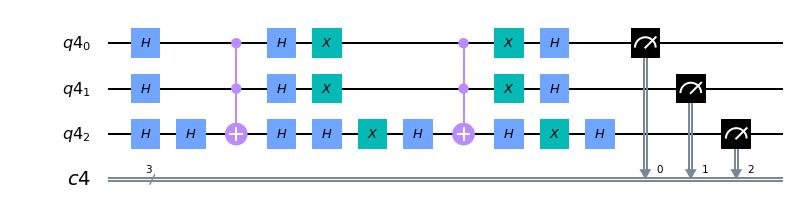

In [38]:
qc.draw(output="mpl")

Run the simulator and create the probability histogram.

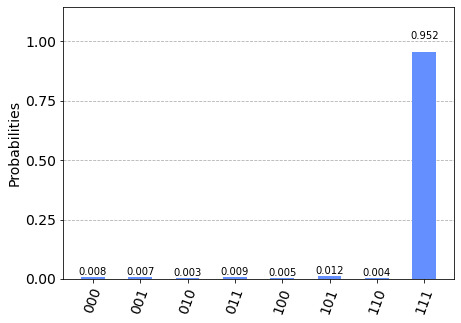

In [34]:
qasm_simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=qasm_simulator,shots=1000)
counts = job.result().get_counts()
plot_histogram(counts)

As expected, the state with the highest probability is the state $\lvert 111 \rangle$.

## More Resources:

To learn more about Grover's Algorithm read the associated book chapter and watch Dr. De Farias' lecture when uploads them. Also read the attached `.pdf` to this `.zip` file.

[Chapter on Grover's Algorithm](grovers.pdf)